# EMPLOYEE ATTRITION

🏢 Project Overview

* This project analyzes job market trends using machine learning techniques. By leveraging advanced data analytics, we aim to predict salary ranges and provide insights based on various factors such as job title, department, and years of experience

🎯 Main Goals:

* 📊 Investigate patterns in employee attributes and salary distributions.
* 💡 Develop predictive models for salary based on job attributes like role, department, and work experience.
* 🔍 Identify key factors influencing salary expectations.
* 👥 Examine which job roles and levels are most influential on salary.
* 📅 Provide actionable insights to job seekers and employers.

📊 Dataset Overview

* This dataset provides comprehensive details on employee attributes and compensation, capturing essential work-related characteristics

🎨 Project Features

1. ✨ Interactive Data Visualization

* 📈 Visualize salary trends and job satisfaction with dynamic charts.
* 🌍 Analyze departmental and role-wise salary distribution.

2. 🤖 Machine Learning Models

* 🔮 Predict monthly income based on employee attributes and job roles.
* 📉 Identify trends in employee performance, satisfaction, and compensation

3. ⚡ Optimization and Recommendations

* 📋 Guide job seekers with salary expectations based on experience, role, and department.
* 🏢 Provide strategic insights for companies to optimize hiring and compensation strategies.

4.🌍 Job Market Insights

* ⚖️ Assess the influence of department, job level, and years at the company on salary.
* 📚 Propose recommendations for career growth, skill development, and role changes.

🔧 Technologies Used

Programming Language: Python 🐍

Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost

# Import Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')


In [44]:
data = pd.read_csv('employee.csv')
data.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,...,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Absenteeism,Work_Environment_Satisfaction,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,58,Female,Married,IT,Manager,1,15488,28,15,4,...,3,4,14,No,6,17,4,20,3,No
1,48,Female,Married,Sales,Assistant,5,13079,28,6,9,...,1,1,6,Yes,2,1,4,25,2,No
2,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,...,2,1,77,Yes,6,2,3,45,3,No
3,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,...,5,4,49,No,9,18,2,35,3,No
4,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,...,5,1,64,No,3,0,4,44,3,No


In [45]:
data.columns

Index(['Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role',
       'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Absenteeism', 'Work_Environment_Satisfaction',
       'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition'],
      dtype='object')

In [46]:
data.shape

(1000, 21)

Statistical Analysis

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

In [48]:
data.describe()

,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Absenteeism,Work_Environment_Satisfaction,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,2.495000,3.151000,2.52700,50.043000,4.877000,9.524000,2.494000,24.507000,2.484000
std,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,1.105077,1.426967,1.13073,28.204657,2.546833,5.973534,1.110494,14.138099,1.111296
min,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.000000,2.000000,2.00000,26.000000,3.000000,4.000000,2.000000,12.000000,1.000000
50%,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,3.000000,3.000000,3.00000,50.000000,5.000000,9.000000,2.000000,24.000000,2.000000
75%,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,3.000000,4.000000,4.00000,75.250000,7.000000,15.000000,4.000000,37.000000,3.000000
max,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,4.000000,5.000000,4.00000,99.000000,9.000000,19.000000,4.000000,49.000000,4.000000


In [49]:
colors = ["#362c50", "#5e344e", "#7f8c8d", "#94e73c", "#c0392b"]
ordered_colors = [colors[0], colors[3], colors[2], colors[1], colors[4]]
sns.set_palette(colors)

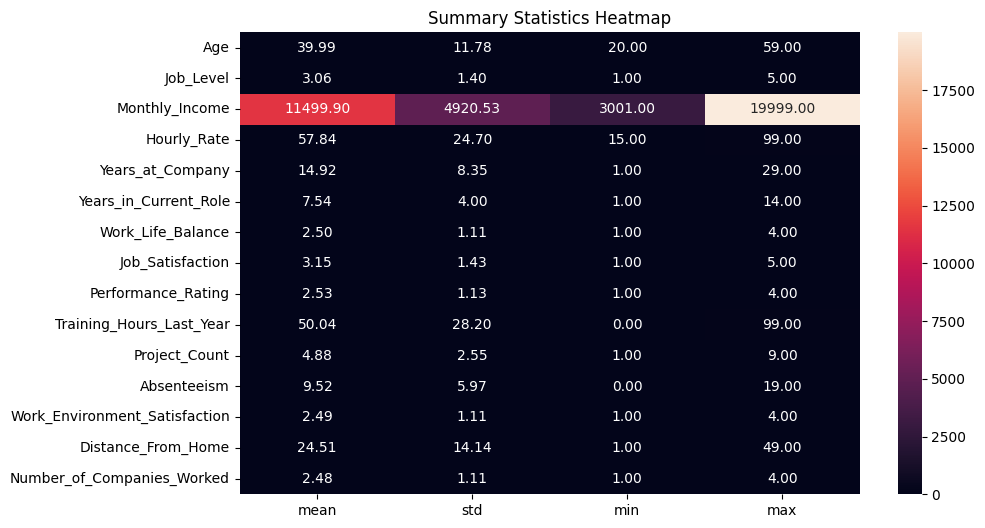

In [50]:
# custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

desc = data.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min','max']], annot=True, fmt='.2f')
plt.title('Summary Statistics Heatmap')
plt.show()

Missing Data Analysis

In [51]:
data.isnull().sum()

Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [52]:
missing_percentage = data.isnull().mean() * 100

missing_table = pd.DataFrame({
    'Missing Data Percentage (%)': missing_percentage
}).reset_index().rename(columns={'index': 'Column'})

print(tabulate(missing_table, headers='keys', tablefmt='grid', showindex=False))

+-------------------------------+-------------------------------+
| Column                        |   Missing Data Percentage (%) |
+===============================+===============================+
| Age                           |                             0 |
+-------------------------------+-------------------------------+
| Gender                        |                             0 |
+-------------------------------+-------------------------------+
| Marital_Status                |                             0 |
+-------------------------------+-------------------------------+
| Department                    |                             0 |
+-------------------------------+-------------------------------+
| Job_Role                      |                             0 |
+-------------------------------+-------------------------------+
| Job_Level                     |                             0 |
+-------------------------------+-------------------------------+
| Monthly_

Outlier Analysis

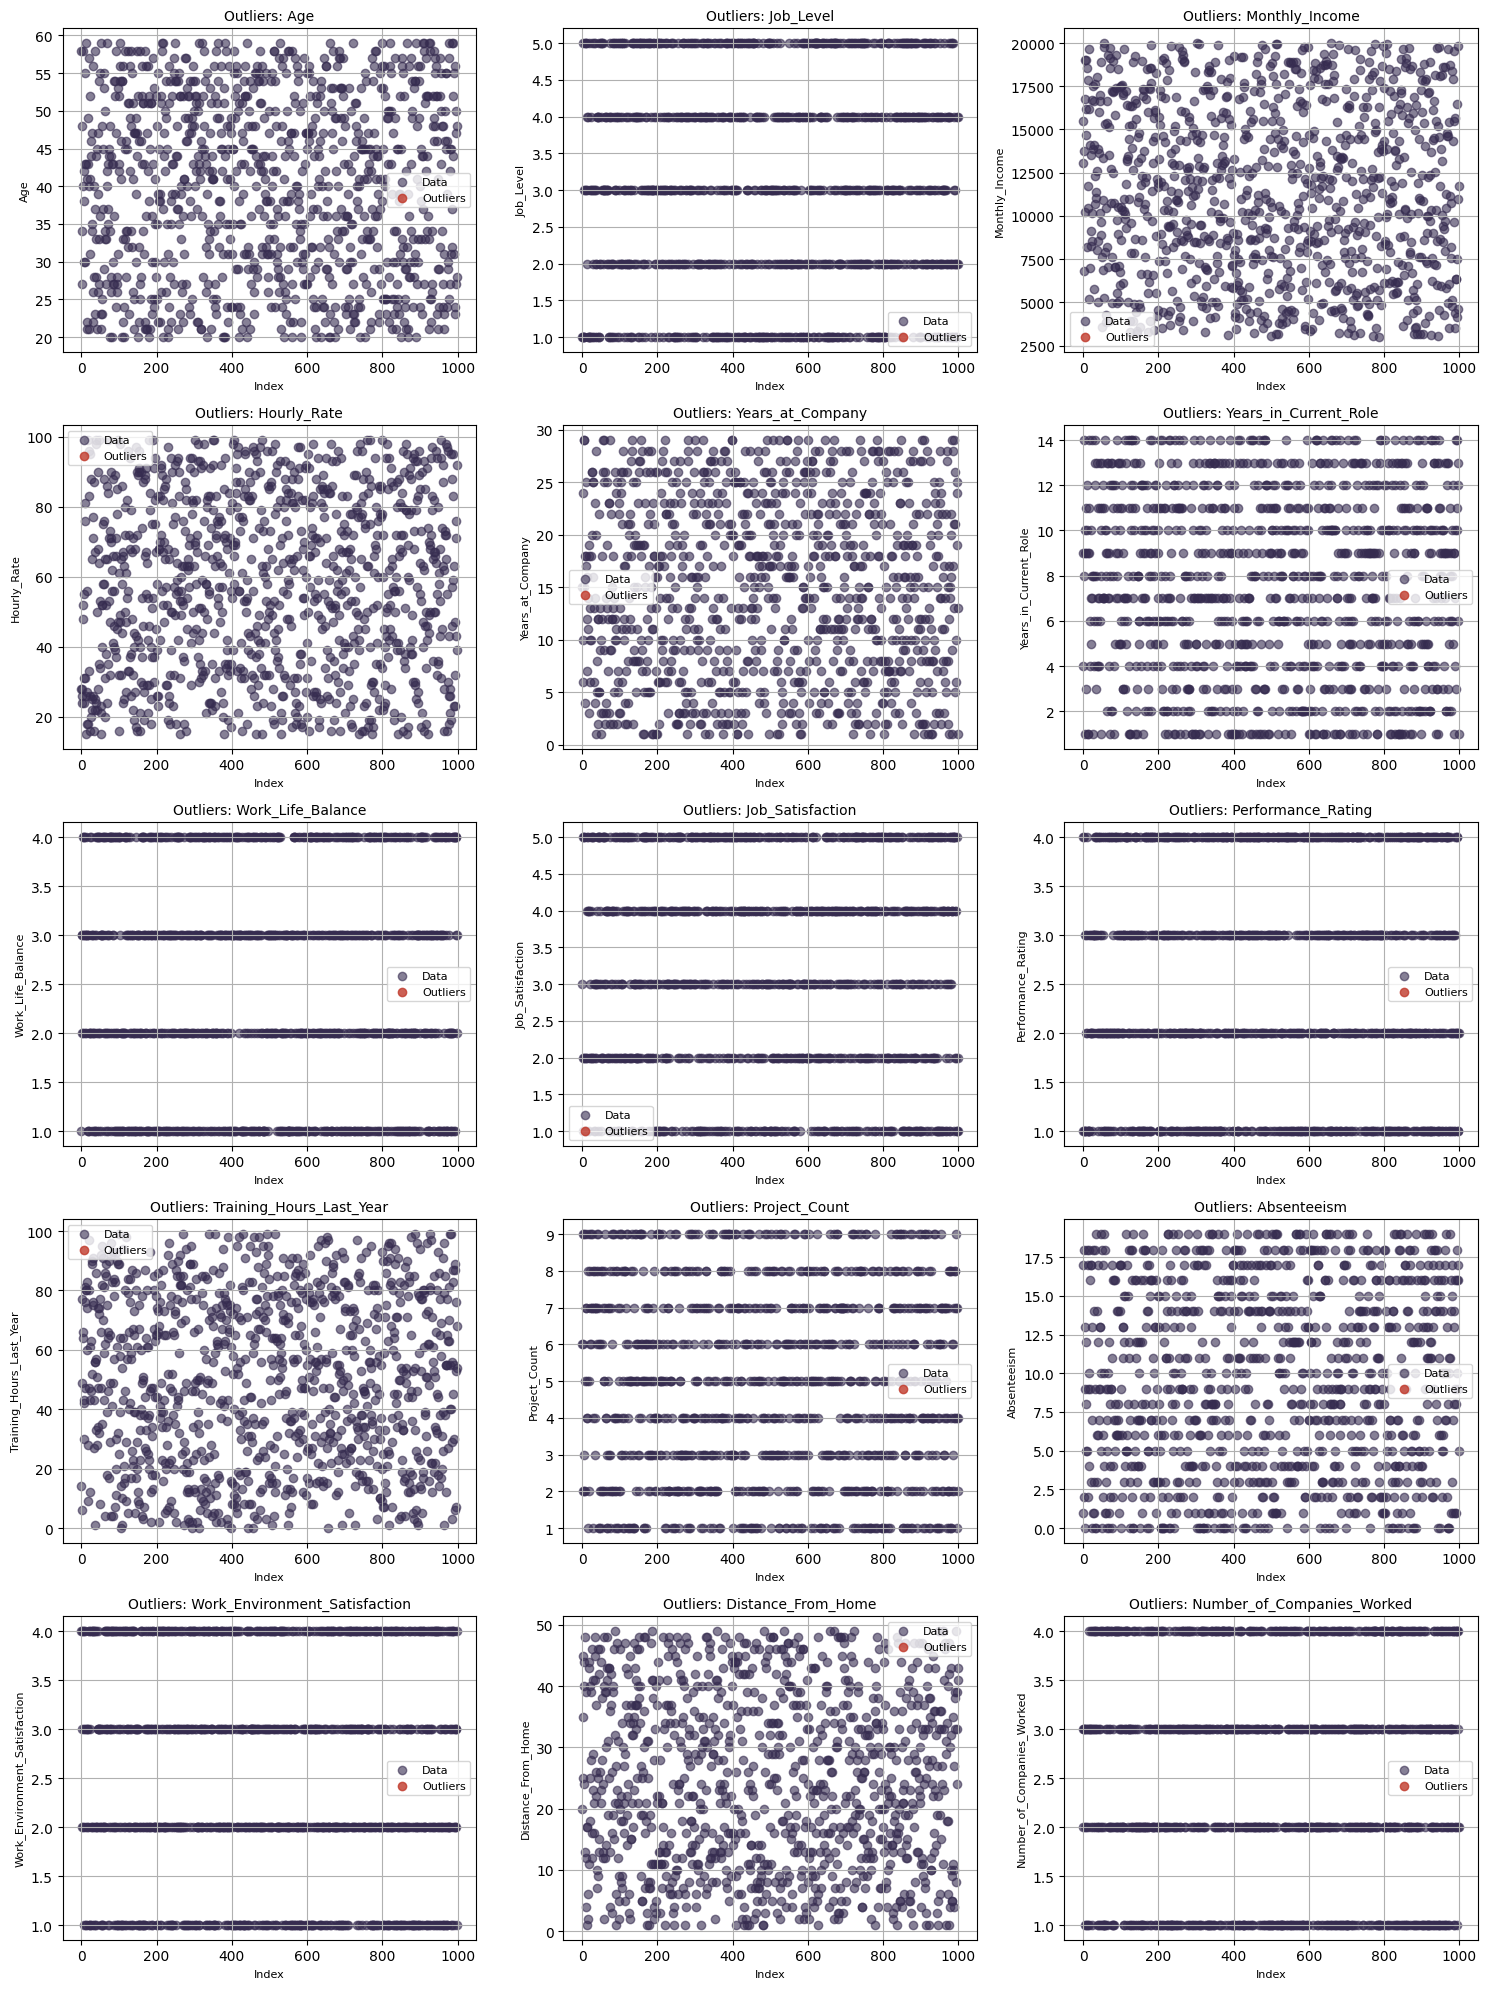

In [53]:
def plot_outliers_iqr(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    threshold = 1.5
    n_cols = 3 
    n_rows = -(-len(numeric_columns) // n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), squeeze=False)
    axes = axes.flatten() 
    
    color_data = colors[0]
    color_outliers = colors[-1]
    
    for idx, column in enumerate(numeric_columns):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

        axes[idx].scatter(data.index, data[column], label='Data', alpha=0.6, color=color_data)
        axes[idx].scatter(data.index[outliers], data[column][outliers], label='Outliers', color=color_outliers, alpha=0.8)
        axes[idx].set_title(f"Outliers: {column}", fontsize=10)
        axes[idx].set_xlabel("Index", fontsize=8)
        axes[idx].set_ylabel(column, fontsize=8)
        axes[idx].legend(fontsize=8)
        axes[idx].grid(True)
        
    for ax in axes[len(numeric_columns):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
plot_outliers_iqr(data)

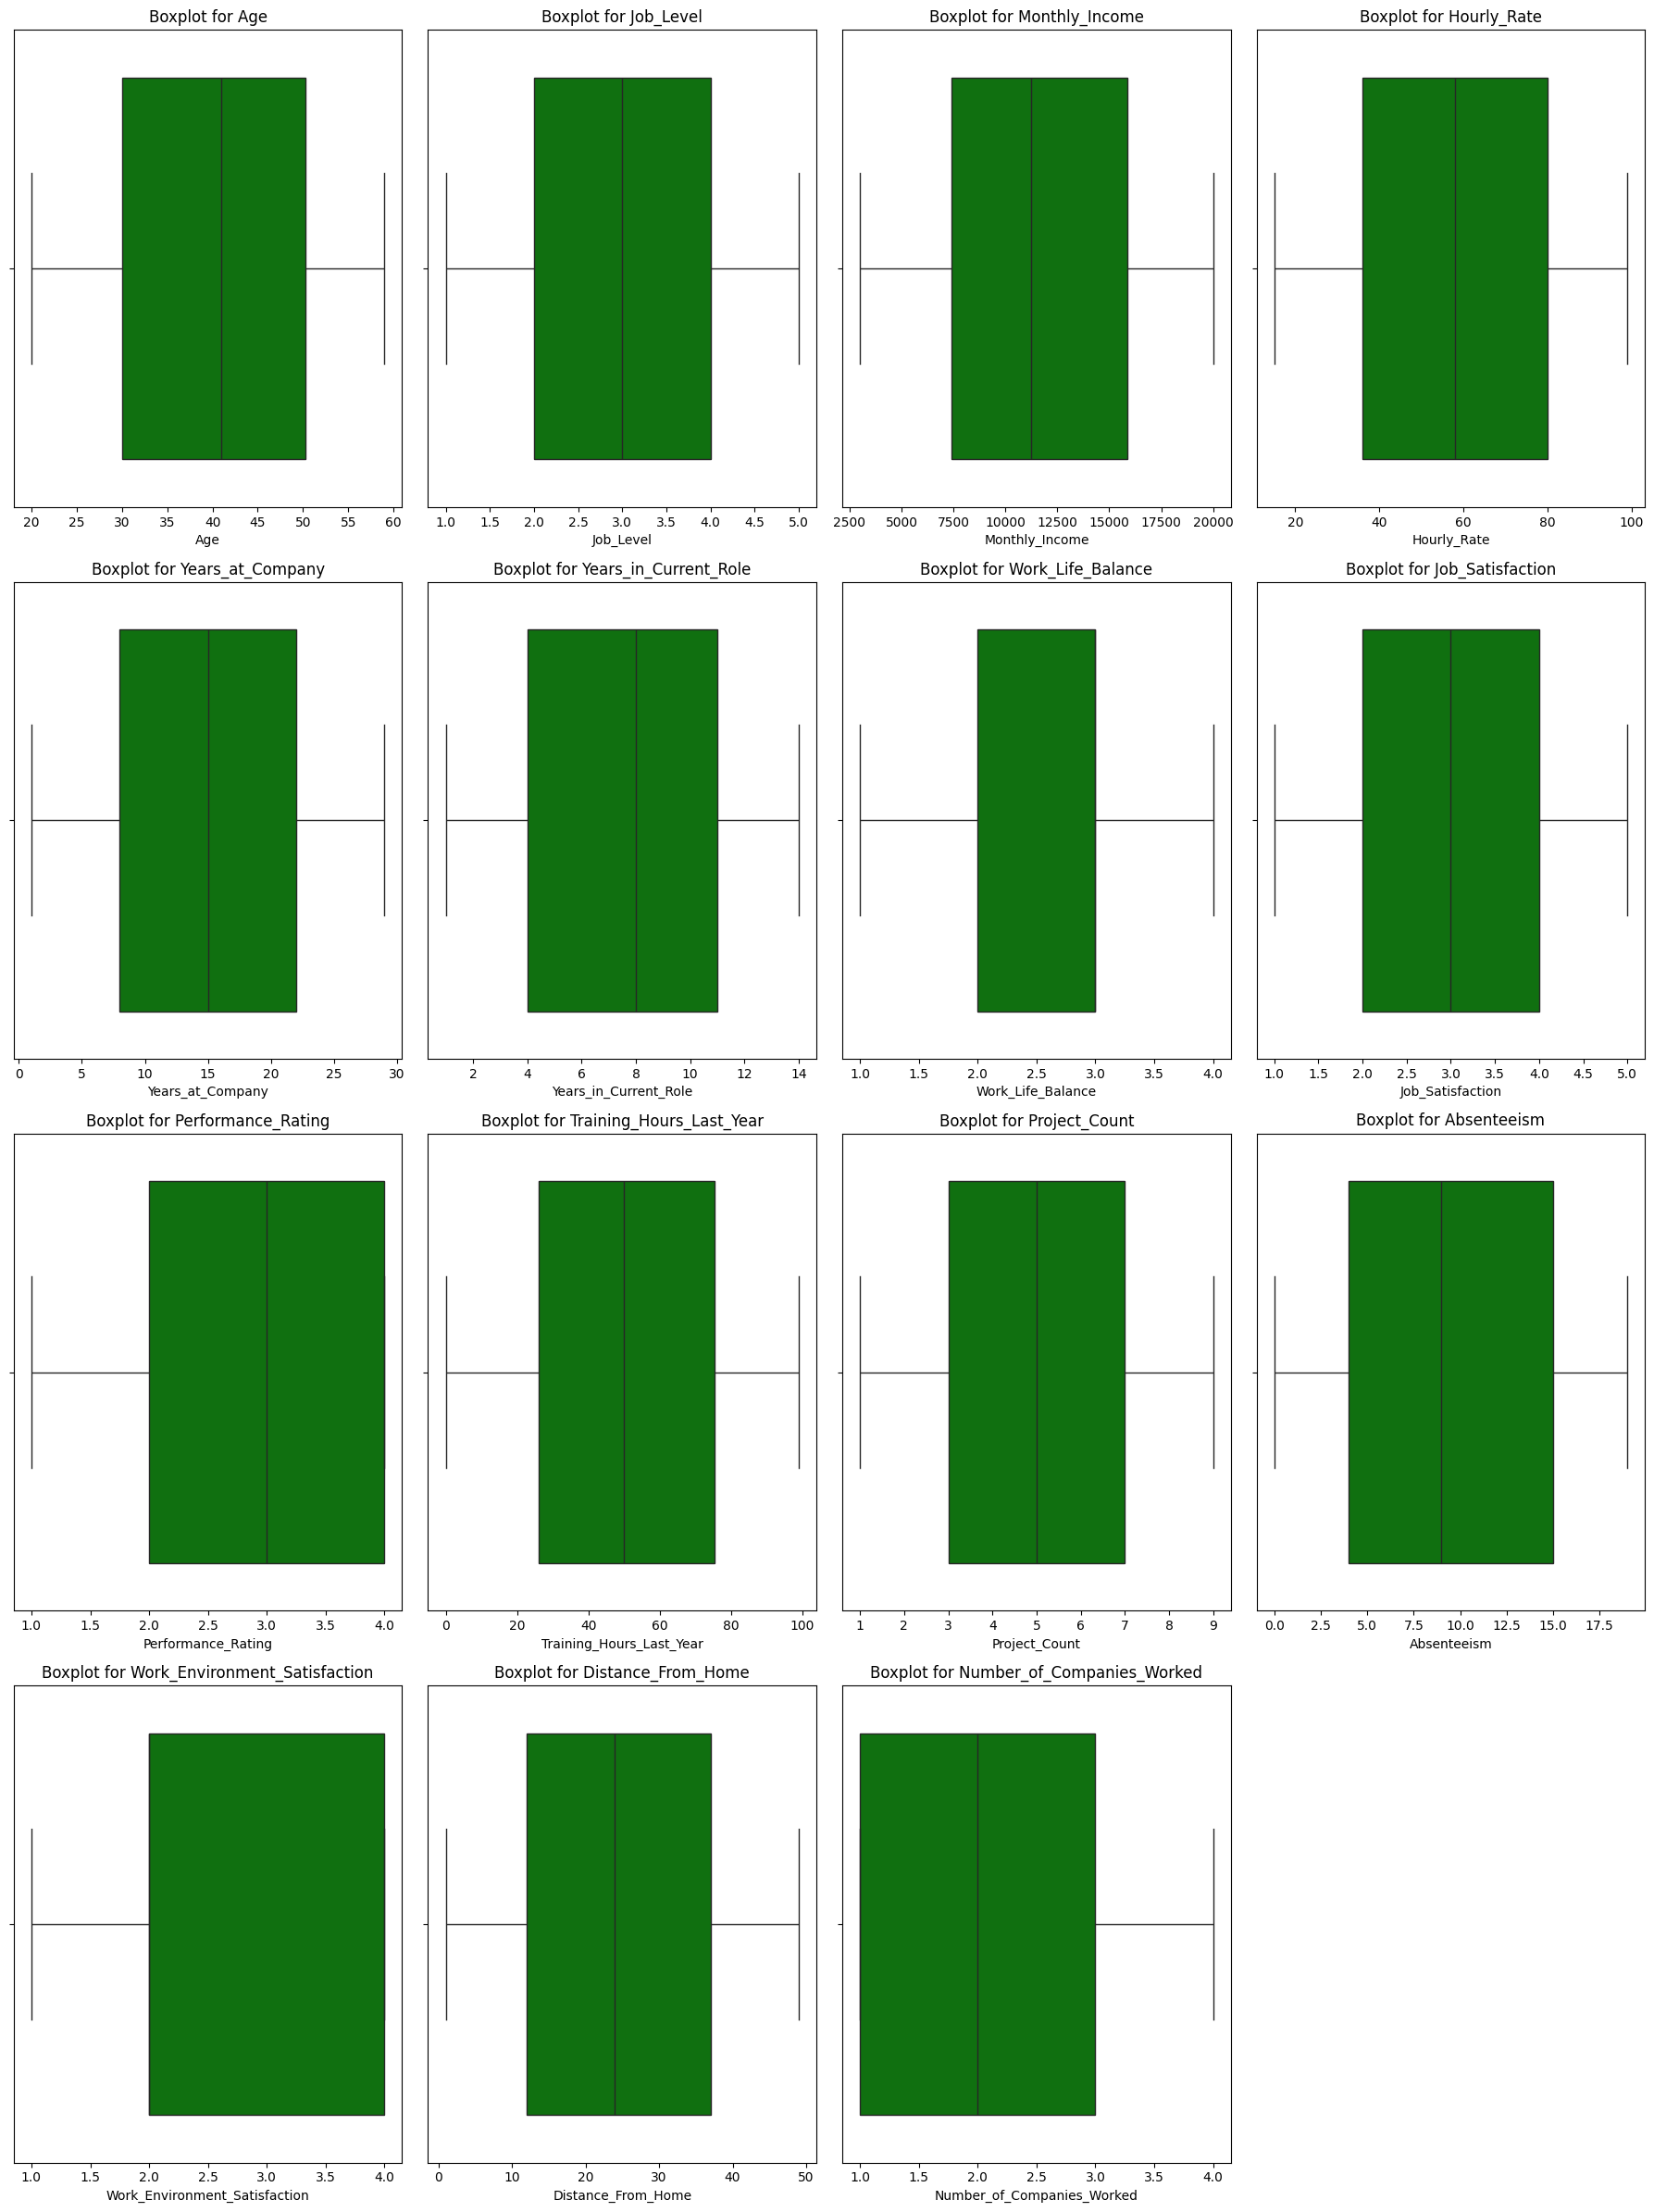

In [54]:
def plot_outliers(df):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 4 
    num_rows = -(-num_columns // num_per_row) 

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        sns.boxplot(x=df[column], ax=axes[i], color="green")
        axes[i].set_title(f'Boxplot for {column}')
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_outliers(data)

In [55]:
def remove_outliers(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data

data = remove_outliers(data)

# Visualization

Distribution of Age

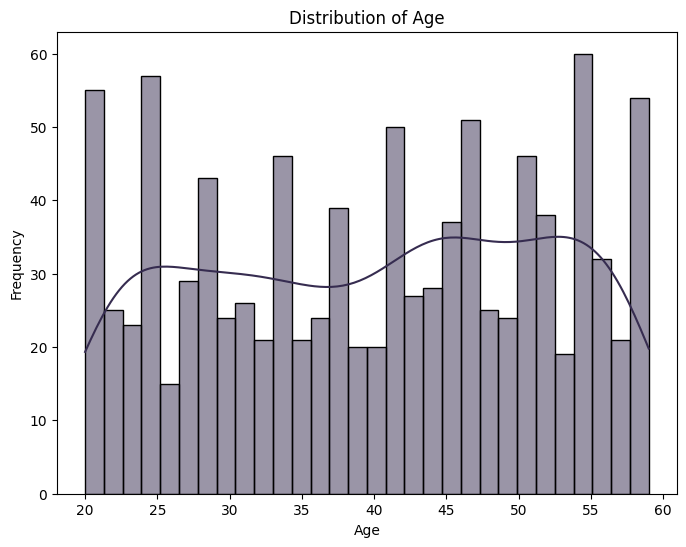

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Monthly Income by Job Level

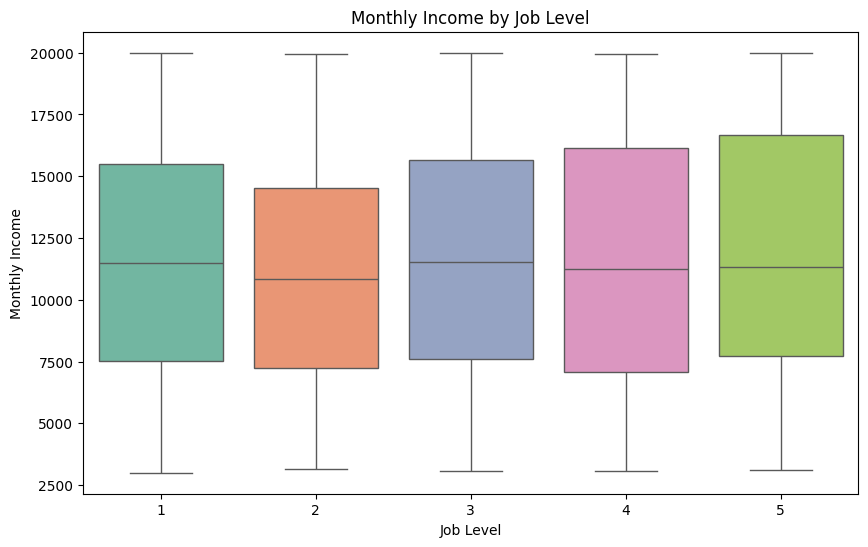

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Level', y='Monthly_Income', data=data, palette="Set2")
plt.title('Monthly Income by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

Department Distribution

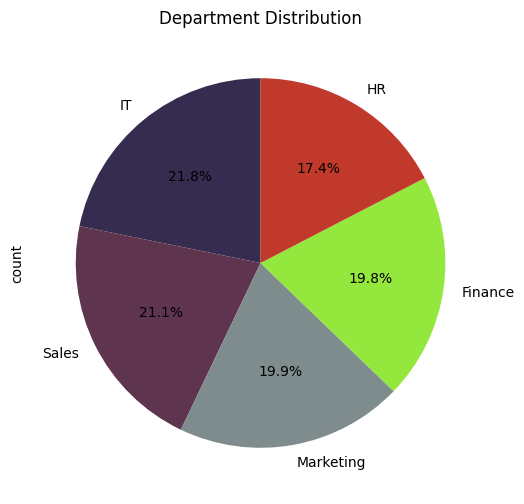

In [58]:
plt.figure(figsize=(6, 6))
labels = 'IT', 'Sales', 'Marketing', 'Finance', 'HR'
data['Department'].value_counts().plot.pie(autopct='%1.1f%%',labels=labels, startangle=90, color=ordered_colors)
plt.title('Department Distribution')
plt.show()

Employee Attrition Count

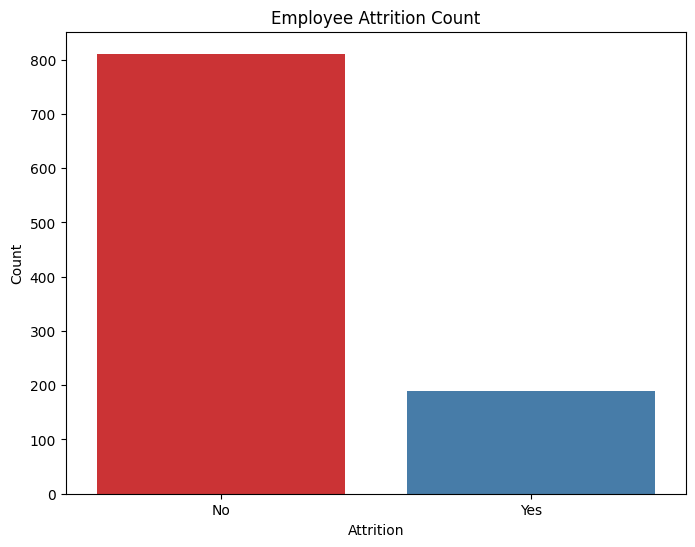

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data, palette="Set1")
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

Average Hourly_Rate per Week by Department


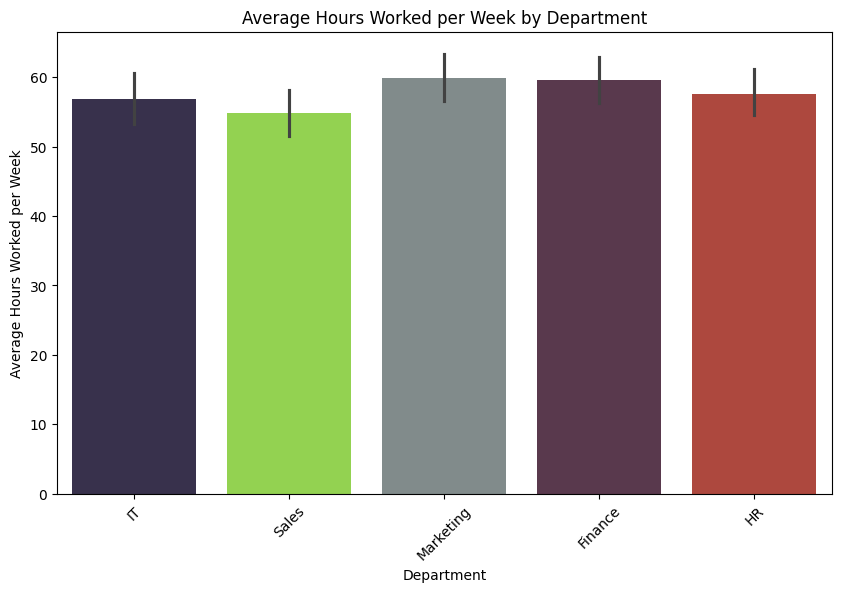

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Hourly_Rate', data=data, palette= ordered_colors)
plt.title('Average Hours Worked per Week by Department')
plt.xlabel('Department')
plt.ylabel('Average Hours Worked per Week')
plt.xticks(rotation=45)
plt.show()

Distribution of Years at Company

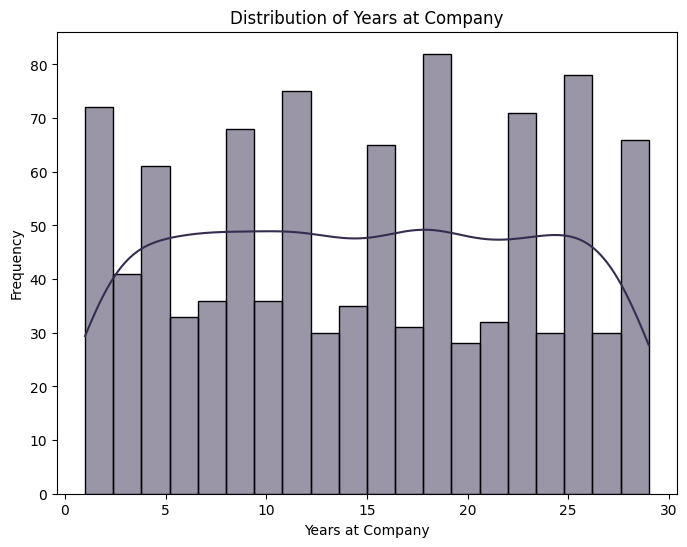

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Years_at_Company'], bins=20, kde=True, palette=ordered_colors[-1])
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

Job Satisfaction by Job Role

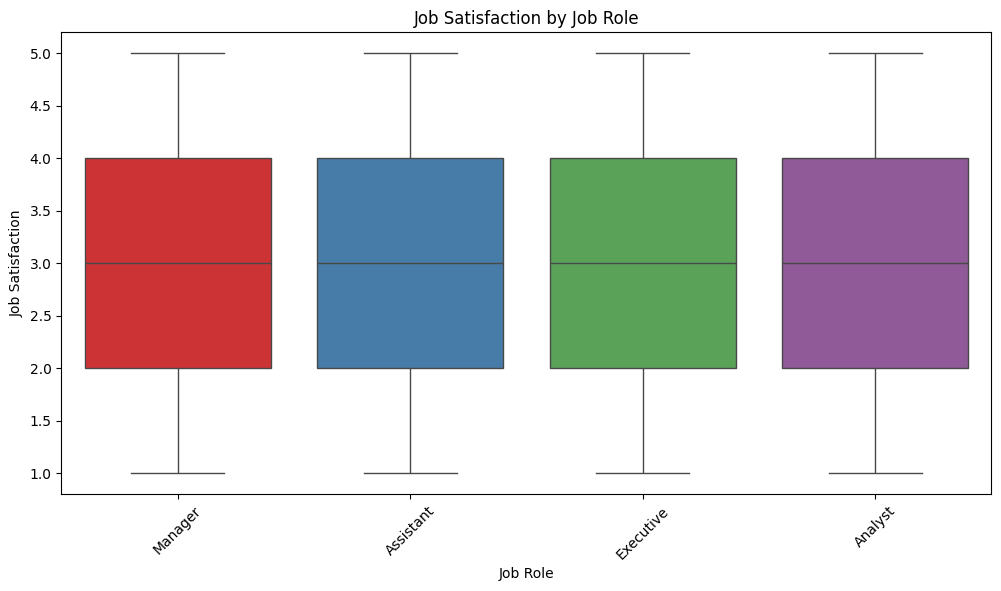

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job_Role', y='Job_Satisfaction', data=data, palette="Set1")
plt.title('Job Satisfaction by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

Monthly Income Distribution by Job Level

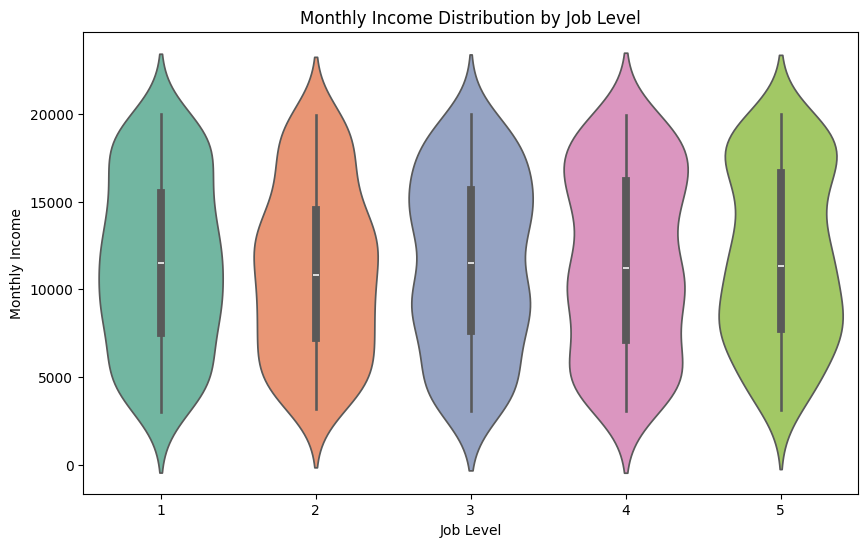

In [63]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Job_Level', y='Monthly_Income', data=data, palette="Set2")
plt.title('Monthly Income Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

In [64]:
data.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,...,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Absenteeism,Work_Environment_Satisfaction,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,58,Female,Married,IT,Manager,1,15488,28,15,4,...,3,4,14,No,6,17,4,20,3,No
1,48,Female,Married,Sales,Assistant,5,13079,28,6,9,...,1,1,6,Yes,2,1,4,25,2,No
2,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,...,2,1,77,Yes,6,2,3,45,3,No
3,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,...,5,4,49,No,9,18,2,35,3,No
4,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,...,5,1,64,No,3,0,4,44,3,No


Deleting variables that will not be used in the model

In [65]:
data = data.drop(columns=['Marital_Status'])

Label Encoder

In [66]:
encoder = LabelEncoder()

label_mappings = {}

for col in data.select_dtypes('object'):
    data[col] = encoder.fit_transform(data[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Gender
0 -> Female
1 -> Male

Column: Department
0 -> Finance
1 -> HR
2 -> IT
3 -> Marketing
4 -> Sales

Column: Job_Role
0 -> Analyst
1 -> Assistant
2 -> Executive
3 -> Manager

Column: Overtime
0 -> No
1 -> Yes

Column: Attrition
0 -> No
1 -> Yes



Train And Test the models

In [67]:
X = data.drop('Attrition',axis = 1)
y = data['Attrition']

In [68]:
X.head()

,Age,Gender,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Absenteeism,Work_Environment_Satisfaction,Distance_From_Home,Number_of_Companies_Worked
0,58,0,2,3,1,15488,28,15,4,1,3,4,14,0,6,17,4,20,3
1,48,0,4,1,5,13079,28,6,9,2,1,1,6,1,2,1,4,25,2
2,34,1,3,1,1,13744,24,24,14,3,2,1,77,1,6,2,3,45,3
3,27,0,3,3,1,6809,26,10,8,3,5,4,49,0,9,18,2,35,3
4,40,1,3,2,1,10206,52,29,10,2,5,1,64,0,3,0,4,44,3


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(800, 19) (200, 19)


Standardization

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models of  Classifier

KNN

In [71]:

KNN_model = KNeighborsClassifier()

KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", KNN_accuracy)

Model accuracy: 0.8


Logistic Regression

In [73]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)


LogisticRegression()

In [74]:
y_pred = log_reg_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:",log_accuracy)

Model Accuracy: 0.845


Random Forest

In [75]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [76]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:",rf_accuracy)

Model Accuracy: 0.845


Desicion Tree

In [77]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [78]:
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:",dt_accuracy)

Model Accuracy: 0.69


XGBoost

In [79]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [80]:
y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:",xgb_accuracy)

Model Accuracy: 0.815


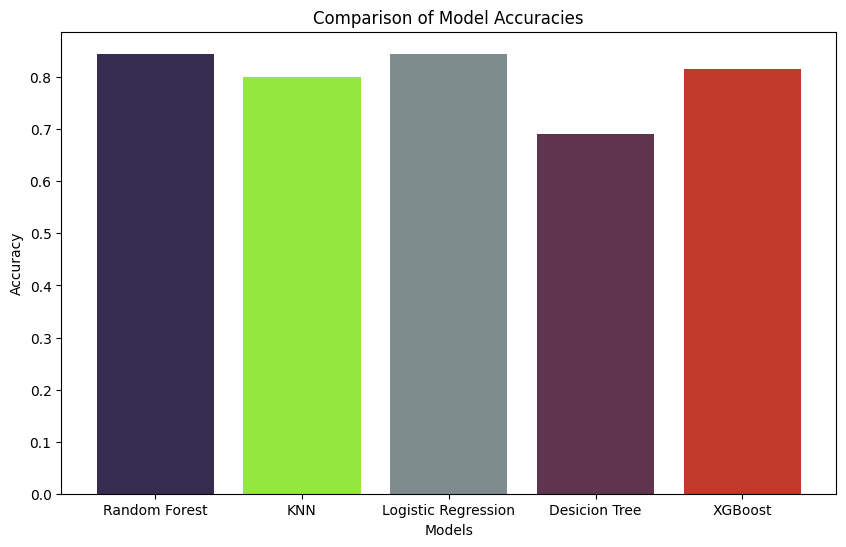

In [81]:
models = ['Random Forest', 'KNN', 'Logistic Regression', 'Desicion Tree', 'XGBoost']
accuracies = [rf_accuracy, KNN_accuracy, log_accuracy, dt_accuracy, xgb_accuracy]


plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=ordered_colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

Save scalar and Model Parameters

In [82]:
import pickle


# save scalar parameters
filename = 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

# model Parameters
filename  = 'new_Rf_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [83]:
data.columns

Index(['Age', 'Gender', 'Department', 'Job_Role', 'Job_Level',
       'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Absenteeism', 'Work_Environment_Satisfaction',
       'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition'],
      dtype='object')

In [84]:
# use saved parameters for future prediction
with open("new_Rf_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# List of feature names in correct order
feature_names = ['Age', 'Gender', 'Department', 'Job_Role', 'Job_Level',
       'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Absenteeism', 'Work_Environment_Satisfaction',
       'Distance_From_Home', 'Number_of_Companies_Worked'
    
]


# collection input from user
print("Enter the following details for prediction:")
user_values = []
for feature in feature_names:
    val = float(input(f"Enter {feature}:"))
    user_values.append(val)



# Convert to array and reshape
input_data = np.array(user_values).reshape(1, -1)

# Scale using the fitted scaler
scaled_data = scaler.transform(input_data)

# Predict
prediction = model.predict(scaled_data)

print(f"\nPredicted Attrition of the employee: {prediction[0:]}")

Enter the following details for prediction:

Predicted Attrition of the employee: [0]
